In [1]:
''' HDBSCAN Experimentation on 1 months data ''' 

import pandas as pd
import glob
import os
import numpy as np
from sklearn.model_selection import train_test_split

#(1) combine 36 months of crime data 09/2018 - 08/2021

path = r'C:\Users\pigle\OneDrive\Documents\Business Analytics\MSc Project\Raw_Data_allYears' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))  # use os.path.join as this makes concatenation OS independent
df_from_each_file = (pd.read_csv(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True) # doesn't create a list, nor does it append to one
#df.to_excel('combined_file.xlsx')
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2018-09,Merseyside Police,Merseyside Police,-2.711600,53.383635,On or near Camberwell Park Road,E01012392,Halton 001A,Anti-social behaviour,NaN,NaN
1,0111ce2b17f7bb96f29fe70a7a06afd1490eb05f3c8683...,2018-09,Merseyside Police,Merseyside Police,-2.747770,53.389499,On or near Cronton Road,E01012393,Halton 001B,Vehicle crime,Unable to prosecute suspect,NaN
2,NaN,2018-09,Merseyside Police,Merseyside Police,-2.849802,53.490299,On or near Depot Road,E01006448,Knowsley 001A,Anti-social behaviour,NaN,NaN
3,NaN,2018-09,Merseyside Police,Merseyside Police,-2.872402,53.484743,On or near Quarryside Drive,E01006448,Knowsley 001A,Anti-social behaviour,NaN,NaN
4,NaN,2018-09,Merseyside Police,Merseyside Police,-2.870599,53.485736,On or near Darmond Road,E01006448,Knowsley 001A,Anti-social behaviour,NaN,NaN


Text(0.5, 1.0, 'Crime Scatterplot 09-2018 ')

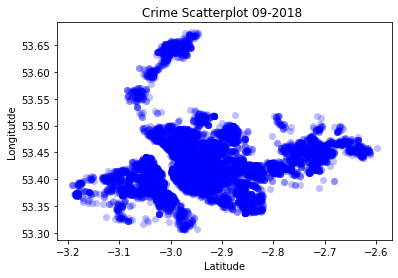

In [2]:
#(2) HDDBSCAN

import matplotlib.pyplot as plt
import seaborn as sns 
import hdbscan
%matplotlib inline
## clean and transform data for spatial clustering
coords = df.loc[:,['Latitude', 'Longitude','Month']] 
coords2 = coords[coords['Month'] == '2018-09']
coords2= coords2.drop(columns=['Month'])
coords2=coords2[['Longitude','Latitude']]
coords_array = coords2[['Longitude','Latitude']].to_numpy()
x_train ,x_test = train_test_split(coords_array,test_size=0.01)
x_train_df = pd.DataFrame(x_train)
x_train_df.head()

plt.scatter(*x_train.T, s=50, linewidths=0, c='b', alpha=0.25)
plt.xlabel('Latitude')            
plt.ylabel('Longitutde')
plt.title('Crime Scatterplot 09-2018 ')

Number of Clusters: 38


Text(0.5, 1.0, 'HDBSCAN 09-2018')

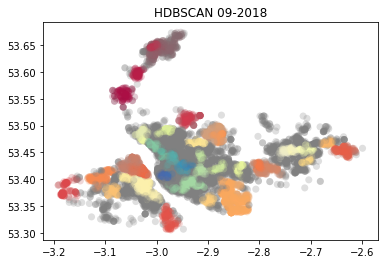

In [3]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=15, prediction_data=True).fit(x_train)
clusters= np.asarray(clusterer.labels_)
clusterer.labels_
print('Number of Clusters:', clusterer.labels_.max())
clusterer.probabilities_

color_palette = sns.color_palette('Spectral', 40)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*x_train.T, s=50, linewidths=0, c=cluster_member_colors, alpha=0.25)
plt.title('HDBSCAN 09-2018')

Text(0.5, 1.0, 'HDBSCAN New Datapoint Cluster Predictions 09-2018')

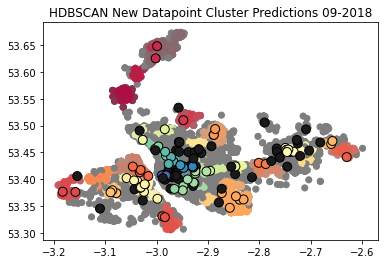

In [4]:
## originally generated random points to test, decided train/test-split would be better test
#test_points = np.random.uniform(low=53.2989, high=53.55, size=(50,)), np.random.uniform(low=-3.19223, high=-2.59898, size=(50,))
#Test = np.asarray(test_points)     
#Test1=Test.transpose() 

#(3) HDBSCAN prediction tasks

colors = [sns.desaturate(color_palette[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
plt.scatter(*x_train.T, s=50, linewidths=0, c=cluster_member_colors, alpha=0.25)
plt.scatter(*x_test.T, c='k', s=50)
test_labels, strengths = hdbscan.approximate_predict(clusterer, x_test)
test_labels
colors = [sns.desaturate(color_palette[col], sat) for col, sat in zip(clusterer.labels_,
                                                            clusterer.probabilities_)]
test_colors = [color_palette[col] if col >= 0 else (0.1, 0.1, 0.1) for col in test_labels]
plt.scatter(x_train.T[0], x_train.T[1], c=colors);
plt.scatter(*x_test.T, c=test_colors, s=80, linewidths=1, edgecolors='k')
plt.title('HDBSCAN New Datapoint Cluster Predictions 09-2018')